In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url='https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'
FlightsDf=pd.read_csv(url)
print(len(FlightsDf))
FlightsDf.head(5)

336776


,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0


104662 111279 120835


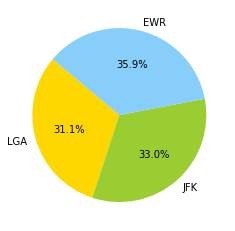

In [3]:
#1:proportion of flights from each airport of NYC
amount_flights_from_lga=len(FlightsDf[FlightsDf['origin']=='LGA'])
amount_flights_from_jfk=len(FlightsDf[FlightsDf['origin']=='JFK'])
amount_flights_from_ewr=len(FlightsDf[FlightsDf['origin']=='EWR'])
print(amount_flights_from_lga,amount_flights_from_jfk,amount_flights_from_ewr)

labels = 'LGA', 'JFK', 'EWR'
sizes=[amount_flights_from_lga,amount_flights_from_jfk,amount_flights_from_ewr]
colors = ['gold', 'yellowgreen',  'lightskyblue']
plt.pie(sizes,  labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.show()

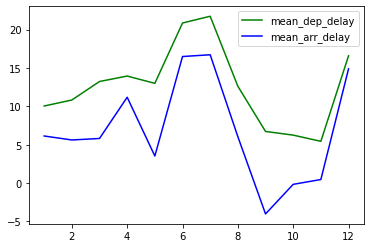

In [4]:
#2:a plot of delays depending from month
mean_dep_delay_by_month=FlightsDf.groupby('month')['dep_delay'].mean().reset_index(name='mean_dep_delay')
mean_arr_delay_by_month=FlightsDf.groupby('month')['arr_delay'].mean().reset_index(name='mean_arr_delay')

plt.plot(mean_dep_delay_by_month['month'],mean_dep_delay_by_month['mean_dep_delay'],color='g',label='mean_dep_delay')
plt.plot(mean_arr_delay_by_month['month'],mean_arr_delay_by_month['mean_arr_delay'],color='b',label='mean_arr_delay')
plt.legend()

#We see that in the middle of summer delays are big and at the beginning of school season delays are small 

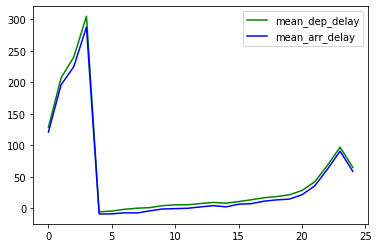

In [5]:
#3: a plot of delays depending from hour
mean_dep_delay_by_hour=FlightsDf.groupby('hour')['dep_delay'].mean().reset_index(name='mean_dep_delay')
mean_arr_delay_by_hour=FlightsDf.groupby('hour')['arr_delay'].mean().reset_index(name='mean_arr_delay')

plt.plot(mean_dep_delay_by_hour['hour'],mean_dep_delay_by_hour['mean_dep_delay'],color='g',label='mean_dep_delay')
plt.plot(mean_arr_delay_by_hour['hour'],mean_arr_delay_by_hour['mean_arr_delay'],color='b',label='mean_arr_delay')
plt.legend()
#we see that delays are most frequent early at the morning

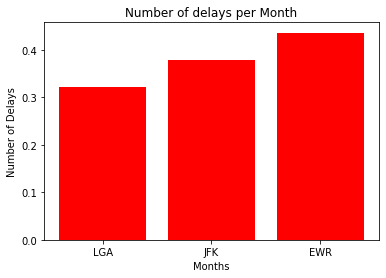

In [51]:
#4: percentage of delayed flights in three airports of NYC
flights_from_lga=FlightsDf[FlightsDf['origin']=='LGA']
amount_flights_from_lga=len(flights_from_lga)
delayed_flights_from_lga=flights_from_lga[flights_from_lga['dep_delay']>0]
amount_delayed_flights_from_lga=len(delayed_flights_from_lga)

flights_from_jfk=FlightsDf[FlightsDf['origin']=='JFK']
amount_flights_from_jfk=len(flights_from_jfk)
delayed_flights_from_jfk=flights_from_jfk[flights_from_jfk['dep_delay']>0]
amount_delayed_flights_from_jfk=len(delayed_flights_from_jfk)

flights_from_ewr=FlightsDf[FlightsDf['origin']=='EWR']
amount_flights_from_ewr=len(flights_from_ewr)
delayed_flights_from_ewr=flights_from_ewr[flights_from_ewr['dep_delay']>0]
amount_delayed_flights_from_ewr=len(delayed_flights_from_ewr)

#print(amount_flights_from_lga,amount_delayed_flights_from_lga)
#print(amount_flights_from_jfk,amount_delayed_flights_from_jfk)
#print(amount_flights_from_ewr,amount_delayed_flights_from_ewr)

airports=['LGA','JFK','EWR']
percentage_of_delayed=[amount_delayed_flights_from_lga/amount_flights_from_lga,
                       amount_delayed_flights_from_jfk/amount_flights_from_jfk,
                       amount_delayed_flights_from_ewr/amount_flights_from_ewr]

plt.bar(airports, percentage_of_delayed, color="red")
plt.ylabel('Number of Delays')
plt.xlabel('Months')
plt.title('Number of delays per Month')
plt.show()

#we see that the least percentage of delays has LGA

-9.0
   dest  mean_dep_delay
50  LEX            -9.0
   dest  mean_dep_delay
50  LEX            -9.0


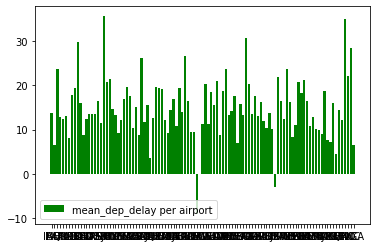

In [42]:
#5: mean delay per airports
unique_airports=FlightsDf['dest'].unique()
mean_dep_delay=FlightsDf.groupby('dest')['dep_delay'].mean().reset_index(name='mean_dep_delay')

grouped=FlightsDf.groupby('dest')['dep_delay'].mean().reset_index(name='mean_dep_delay')
print(FlightsDf.groupby('dest')['dep_delay'].mean().min())
print(grouped[grouped['mean_dep_delay']==-9])
print(grouped[grouped['dest']=='LEX'])
plt.bar(unique_airports,mean_dep_delay['mean_dep_delay'],color='g',label='mean_dep_delay per airport')
plt.legend()
#we see that there is one airport LEX with min delay and two with approx max delay

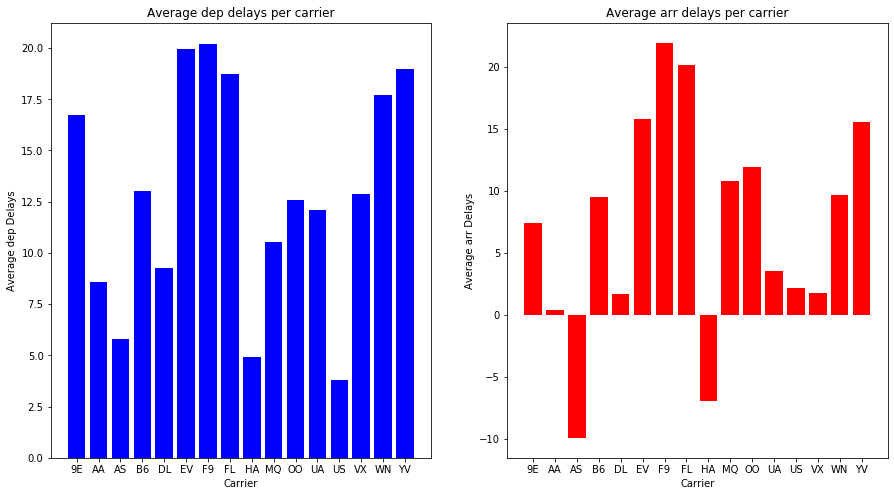

In [55]:
#6: perecent delays per carrier
mean_dep_delay_per_carrier=FlightsDf.groupby('carrier')['dep_delay'].mean().reset_index(name='mean_dep_delay')
#print(mean_dep_delay_per_carrier)
mean_arr_delay_per_carrier=FlightsDf.groupby('carrier')['arr_delay'].mean().reset_index(name='mean_arr_delay')

carrier=mean_dep_delay_per_carrier['carrier']
dep_delay=mean_dep_delay_per_carrier['mean_dep_delay']
arr_delay=mean_arr_delay_per_carrier['mean_arr_delay']

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.bar(carrier, dep_delay, color="blue")
plt.ylabel('Average dep Delays')
plt.xlabel('Carrier')
plt.title('Average dep delays per carrier')

plt.subplot(1,2,2)
plt.bar(carrier, arr_delay, color="red")
plt.ylabel('Average arr Delays')
plt.xlabel('Carrier')
plt.title('Average arr delays per carrier')
plt.show()


In [77]:
#glue the weather to the flights
url2='https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv'

WeatherDf=pd.read_csv(url2)
#print(len(WeatherDf))
WeatherDf.head(5)

flights_delayed = FlightsDf[FlightsDf['dep_delay']>0] 
groupby_output = \
flights_delayed.groupby([flights_delayed['origin'],flights_delayed['month'], flights_delayed['day'], flights_delayed['hour']])
grouped_origin_time_hour = groupby_output['dep_delay'].agg([np.size, np.mean]).reset_index()
grouped_origin_time_hour.head()

flights_with_weather = pd.merge(grouped_origin_time_hour, WeatherDf, on=['origin','hour','day','month'])
flights_with_weather = flights_with_weather.rename(columns={'size': 'Count', 'mean': 'TotalDelay'})
flights_with_weather.head()




,origin,month,day,hour,Count,TotalDelay,Unnamed: 0,year,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,EWR,1,1,6.0,5.0,8.400000,6,2013,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
1,EWR,1,1,7.0,4.0,22.250000,7,2013,39.02,26.96,61.63,250.0,8.05546,9.270062,0.0,1012.3,10.0
2,EWR,1,1,8.0,6.0,5.500000,8,2013,39.02,28.04,64.43,240.0,11.50780,13.242946,0.0,1012.5,10.0
3,EWR,1,1,9.0,7.0,35.428571,9,2013,39.92,28.04,62.21,250.0,12.65858,14.567241,0.0,1012.2,10.0
4,EWR,1,1,10.0,7.0,10.428571,10,2013,39.02,28.04,64.43,260.0,12.65858,14.567241,0.0,1011.9,10.0


Text(0.5, 1.0, 'delays per visibility')

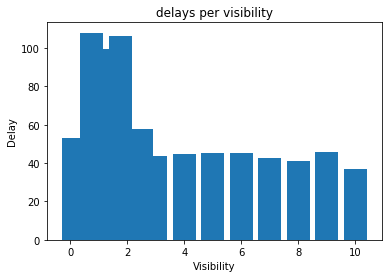

In [78]:
#7:plot of visibility against delays
by_visib=flights_with_weather.groupby('visib')['TotalDelay'].mean().reset_index(name='delay')
by_visib
plt.bar(by_visib['visib'],by_visib['delay'])
plt.ylabel('Delay')
plt.xlabel('Visibility')
plt.title('delays per visibility')



Text(0.5, 1.0, 'delays per visibility')

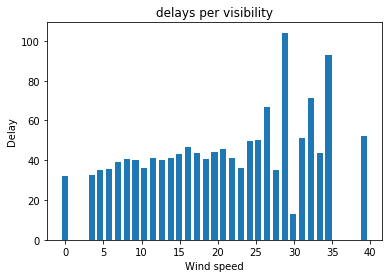

In [91]:
#8:plot of wind speed against delays
by_wind_speed=flights_with_weather.groupby('wind_speed')['TotalDelay'].mean().reset_index(name='delay')
by_wind_speed=by_wind_speed[0:30]
plt.bar(by_wind_speed['wind_speed'],by_wind_speed['delay'])
plt.ylabel('Delay')
plt.xlabel('Wind speed')
plt.title('delays per visibility')


([<matplotlib.patches.Wedge at 0x12b2b5cc0>,
 [Text(0.8887131819198444, 0.6482197777620687, 'LGA'),
  Text(-0.251234903183254, 1.0709253117853277, 'JFK'),
  Text(-0.42810821895749324, -1.0132735824351897, 'EWR')])

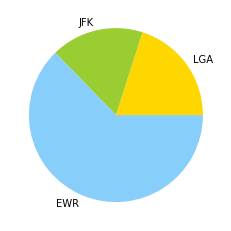

In [132]:
#9:plot of visibility against delays
by_origin=flights_with_weather.groupby('origin')['TotalDelay'].mean().reset_index(name='delay')

labels = 'LGA', 'JFK', 'EWR'

sizes=by_origin['delay']
colors = ['gold', 'yellowgreen',  'lightskyblue']
plt.pie(sizes,labels=labels,colors=colors)



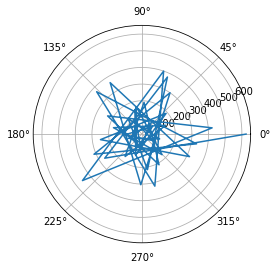

In [147]:
#10
df=WeatherDf.copy()
df['amount']=df['day'].apply(lambda x: 1)
df.head()

wind_dir=df.groupby('wind_dir')['amount'].sum().reset_index(name='amount')
#wind_dir.head()
angles=wind_dir['wind_dir']
values=wind_dir['amount']

ax = plt.subplot(111, polar=True)

ax.plot(angles,values)

#The direction of winds in NYC